## Data Analysis and Visualization
In this interactive notebook, we perform some analysis and hypothesis testing to determine if there is any relationship between the quality of the air in four states (Illinois, New York, California, and Georgia) and the rates of respiratory cancers in these states. To start, we will need to import the required libraries that we will use for statistical testing and data manipulations.

In [200]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from pyaqs import AQSFetcher
sns.set()
sns.set_context('talk')
analysis_fetcher = AQSFetcher('bbjornstad.flatiron@gmail.com', 'ochrefox21')

Now, we can read in our cleaned data from the [`cleaned_data`](./cleaned_data/) folder. We will fetch both the air quality data as well as the cancer rates in these states, as broken down between counties.

In [176]:
ca_aq_df = pd.read_csv('cleaned_data/ca_aq_data.csv')
il_aq_df = pd.read_csv('cleaned_data/il_aq_data.csv')
ny_aq_df = pd.read_csv('cleaned_data/ny_aq_data.csv')
ga_aq_df = pd.read_csv('cleaned_data/ga_aq_data.csv')

In [177]:
ca_cancer_rates = pd.read_csv('cleaned_data/ca_all_counties_cancer_rates.csv')
il_cancer_rates = pd.read_csv('cleaned_data/il_all_counties_cancer_rates.csv')
ny_cancer_rates = pd.read_csv('cleaned_data/ny_all_counties_cancer_rates.csv')
ga_cancer_rates = pd.read_csv('cleaned_data/ga_all_counties_cancer_rates.csv')

In [178]:
ca_cancer_rates.head()

,Unnamed: 0,County,Year,AgeAdjustedRate,CaseCount,Population
0,0,Mono,2012-2016,25.9,20,70372
1,1,Marin,2012-2016,35.1,680,1299494
2,2,Monterey,2012-2016,36.8,763,2154029
3,3,Los Angeles,2012-2016,36.6,18307,50321257
4,4,Santa Cruz,2012-2016,37.0,538,1357213


As we can see, the import of our data produced an extra unneeded column, which we will quickly remove.

In [179]:
cancer_rates = [ca_cancer_rates, il_cancer_rates, ny_cancer_rates, ga_cancer_rates]
aq_dfs = [ca_aq_df, il_aq_df, ny_aq_df, ga_aq_df]
for i in range(len(cancer_rates)):
    cancer_rates[i].drop(columns=['Unnamed: 0'], inplace=True)
    aq_dfs[i].drop(columns=['Unnamed: 0'], inplace=True)

In [180]:
ca_cancer_rates.head()

,County,Year,AgeAdjustedRate,CaseCount,Population
0,Mono,2012-2016,25.9,20,70372
1,Marin,2012-2016,35.1,680,1299494
2,Monterey,2012-2016,36.8,763,2154029
3,Los Angeles,2012-2016,36.6,18307,50321257
4,Santa Cruz,2012-2016,37.0,538,1357213


Now, we can merge together our associated dataframes along the county name to produce a dataframe suitable for visualization and further hypothesis analysis.

In [181]:
ca_aq_df.head()

,county_code,site_number,parameter_code,parameter,sample_duration,year,units_of_measure,observation_count,exceptional_data_count,null_observation_count,arithmetic_mean,standard_deviation,local_site_name,site_address,state,county,city,date_of_last_change
0,73,1006,44201,Ozone,1 HOUR,2012,Parts per million,8268,0,516,0.057747,0.014912,Alpine,"2300 VICTORIA DR., ALPINE",California,San Diego,Alpine,2018-07-21
1,73,1006,44201,Ozone,8-HR RUN AVG BEGIN HOUR,2012,Parts per million,8582,0,0,0.051136,0.012308,Alpine,"2300 VICTORIA DR., ALPINE",California,San Diego,Alpine,2018-07-21
2,73,1006,44201,Ozone,8-HR RUN AVG BEGIN HOUR,2012,Parts per million,8582,0,0,0.051136,0.012308,Alpine,"2300 VICTORIA DR., ALPINE",California,San Diego,Alpine,2018-07-21
3,73,1006,44201,Ozone,8-HR RUN AVG BEGIN HOUR,2012,Parts per million,6138,0,0,0.050950,0.012460,Alpine,"2300 VICTORIA DR., ALPINE",California,San Diego,Alpine,2018-07-21
4,73,1006,44201,Ozone,1 HOUR,2013,Parts per million,8143,0,617,0.058930,0.013469,Alpine,"2300 VICTORIA DR., ALPINE",California,San Diego,Alpine,2018-07-21


In [182]:
ca_aq_time_means = ca_aq_df.groupby(['county', 'parameter']).mean().reset_index()
ca_aq_time_means.head()

,county,parameter,county_code,site_number,parameter_code,year,observation_count,exceptional_data_count,null_observation_count,arithmetic_mean,standard_deviation
0,Alameda,Carbon monoxide,1.0,10.642857,42101.0,2014.357143,8055.071429,0.000000,119.678571,0.420692,0.229867
1,Alameda,Nitrogen dioxide (NO2),1.0,425.375000,42602.0,2014.208333,7703.416667,0.000000,190.958333,15.562419,8.261447
2,Alameda,Ozone,1.0,615.782609,44201.0,2014.217391,7090.652174,159.184783,49.826087,0.033779,0.010086
3,Alameda,PM2.5 - Local Conditions,1.0,9.684211,88101.0,2014.263158,1815.568421,0.000000,22.389474,8.641273,5.233965
4,Alameda,Sulfur dioxide,1.0,11.000000,42401.0,2014.000000,4623.500000,0.000000,190.600000,1.030929,1.426650


In [183]:
il_aq_time_means = il_aq_df.groupby(['county', 'parameter']).mean().reset_index()
ny_aq_time_means = ny_aq_df.groupby(['county', 'parameter']).mean().reset_index()

In [184]:
ca_merged_df = ca_aq_time_means.join(ca_cancer_rates.set_index('County'), how='inner', on='county')
ca_merged_df.head(10)

,county,parameter,county_code,site_number,parameter_code,year,observation_count,exceptional_data_count,null_observation_count,arithmetic_mean,standard_deviation,Year,AgeAdjustedRate,CaseCount,Population
0,Alameda,Carbon monoxide,1.0,10.642857,42101.0,2014.357143,8055.071429,0.000000,119.678571,0.420692,0.229867,2012-2016,41.5,3416,8041533
1,Alameda,Nitrogen dioxide (NO2),1.0,425.375000,42602.0,2014.208333,7703.416667,0.000000,190.958333,15.562419,8.261447,2012-2016,41.5,3416,8041533
2,Alameda,Ozone,1.0,615.782609,44201.0,2014.217391,7090.652174,159.184783,49.826087,0.033779,0.010086,2012-2016,41.5,3416,8041533
3,Alameda,PM2.5 - Local Conditions,1.0,9.684211,88101.0,2014.263158,1815.568421,0.000000,22.389474,8.641273,5.233965,2012-2016,41.5,3416,8041533
4,Alameda,Sulfur dioxide,1.0,11.000000,42401.0,2014.000000,4623.500000,0.000000,190.600000,1.030929,1.426650,2012-2016,41.5,3416,8041533
5,Amador,Ozone,5.0,2.000000,44201.0,2014.000000,7972.000000,0.000000,80.650000,0.044246,0.014714,2012-2016,59.5,209,185015
6,Butte,Carbon monoxide,7.0,7.000000,42101.0,2013.666667,6681.083333,0.000000,165.666667,0.269892,0.201070,2012-2016,57.8,849,1117709
7,Butte,Nitrogen dioxide (NO2),7.0,7.000000,42602.0,2013.666667,6864.833333,0.000000,307.833333,12.140098,7.067682,2012-2016,57.8,849,1117709
8,Butte,Ozone,7.0,7.000000,44201.0,2013.818182,7315.454545,0.000000,98.159091,0.044148,0.012274,2012-2016,57.8,849,1117709
9,Butte,PM10 Total 0-10um STP,7.0,7.400000,81102.0,2014.100000,2027.000000,0.000000,31.100000,19.720350,12.725369,2012-2016,57.8,849,1117709


In [185]:
ga_aq_time_means = ga_aq_df.groupby(['county', 'parameter']).mean().reset_index()
ga_aq_time_means.head()

,county,parameter,county_code,site_number,parameter_code,year,observation_count,exceptional_data_count,null_observation_count,arithmetic_mean,standard_deviation
0,Bartow,Lead (TSP) LC,15.0,3.000000,14129.0,2012.5,61.50,0.000000,0.000000,0.012932,0.011252
1,Bibb,Ozone,21.0,12.000000,44201.0,2014.0,5375.80,0.000000,26.750000,0.043618,0.011525
2,Bibb,PM10 Total 0-10um STP,21.0,7.000000,81102.0,2012.0,57.00,0.000000,4.000000,20.328197,8.606977
3,Bibb,PM2.5 - Local Conditions,21.0,8.842105,88101.0,2014.0,174.00,0.315789,13.105263,9.677191,4.172899
4,Bibb,Sulfur dioxide,21.0,12.000000,42401.0,2014.0,5086.45,0.000000,96.800000,1.242514,0.917359


In [186]:
ga_merged_df = ga_aq_time_means.join(ga_cancer_rates.set_index('County'), how='inner', on='county')
ga_merged_df.head(10)

,county,parameter,county_code,site_number,parameter_code,year,observation_count,exceptional_data_count,null_observation_count,arithmetic_mean,standard_deviation,Year,AgeAdjustedRate,CaseCount,Population
0,Bartow,Lead (TSP) LC,15.0,3.000000,14129.0,2012.50,61.500,0.000000,0.000000,0.012932,0.011252,2012-2016,79.6,434,508425
1,Bibb,Ozone,21.0,12.000000,44201.0,2014.00,5375.800,0.000000,26.750000,0.043618,0.011525,2012-2016,74.0,661,773420
2,Bibb,PM10 Total 0-10um STP,21.0,7.000000,81102.0,2012.00,57.000,0.000000,4.000000,20.328197,8.606977,2012-2016,74.0,661,773420
3,Bibb,PM2.5 - Local Conditions,21.0,8.842105,88101.0,2014.00,174.000,0.315789,13.105263,9.677191,4.172899,2012-2016,74.0,661,773420
4,Bibb,Sulfur dioxide,21.0,12.000000,42401.0,2014.00,5086.450,0.000000,96.800000,1.242514,0.917359,2012-2016,74.0,661,773420
5,Chatham,Ozone,51.0,21.000000,44201.0,2014.00,5329.200,0.000000,38.600000,0.039020,0.010351,2012-2016,61.8,943,1413533
6,Chatham,PM10 Total 0-10um STP,51.0,14.000000,81102.0,2012.00,56.000,0.000000,4.000000,15.696429,5.176589,2012-2016,61.8,943,1413533
7,Chatham,PM2.5 - Local Conditions,51.0,63.250000,88101.0,2013.25,177.125,0.250000,38.000000,9.252655,4.104157,2012-2016,61.8,943,1413533
8,Chatham,Sulfur dioxide,51.0,511.500000,42401.0,2014.00,5010.250,0.000000,157.650000,3.641670,5.934503,2012-2016,61.8,943,1413533
9,Chattooga,Ozone,55.0,1.000000,44201.0,2014.00,5182.750,0.000000,14.350000,0.042338,0.010392,2012-2016,89.9,147,125251


In [187]:
il_merged_df = il_aq_time_means.join(il_cancer_rates.set_index('County'), how='inner', on='county')
ny_merged_df = ny_aq_time_means.join(ny_cancer_rates.set_index('County'), how='inner', on='county')

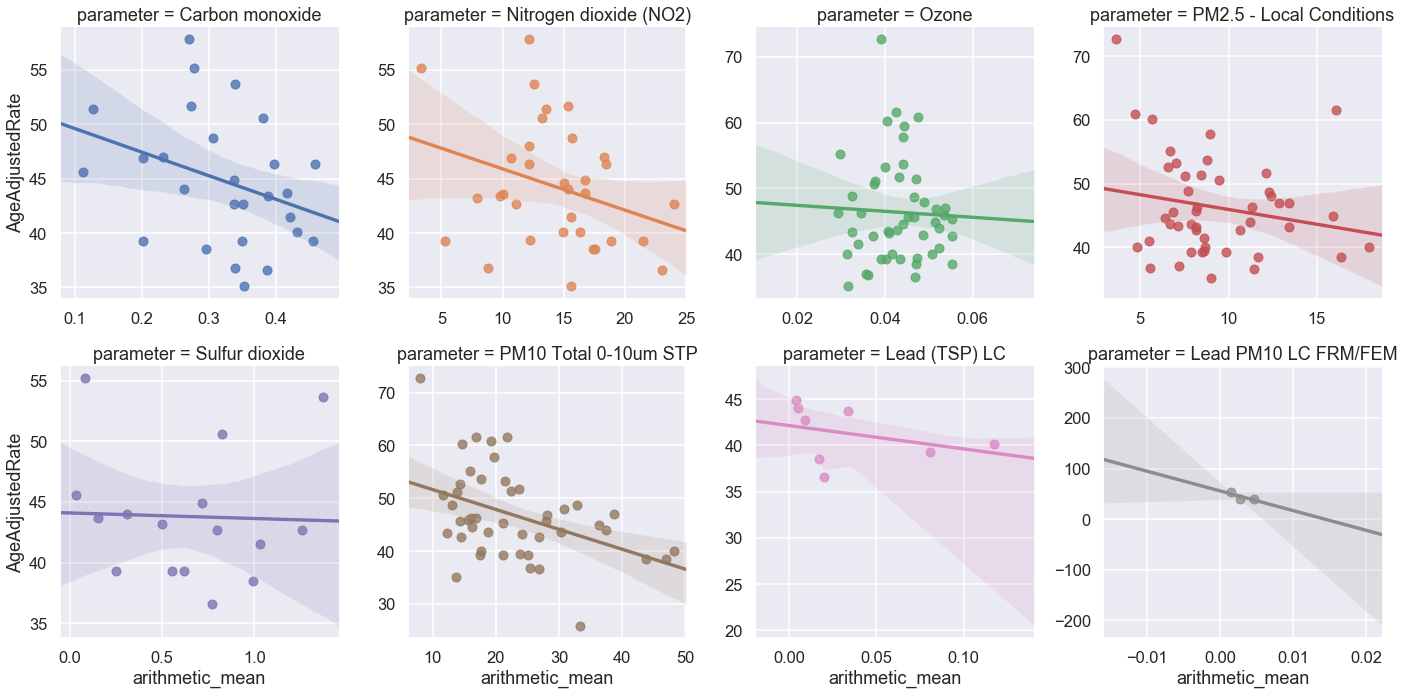

In [188]:
ca_lm = sns.lmplot(
    x='arithmetic_mean',
    y='AgeAdjustedRate', 
    hue='parameter', 
    col='parameter', 
    data=ca_merged_df, 
    col_wrap=4, 
    sharex=False, 
    sharey=False);

ca_lm.savefig('plots/ca_relations_by_param.png')

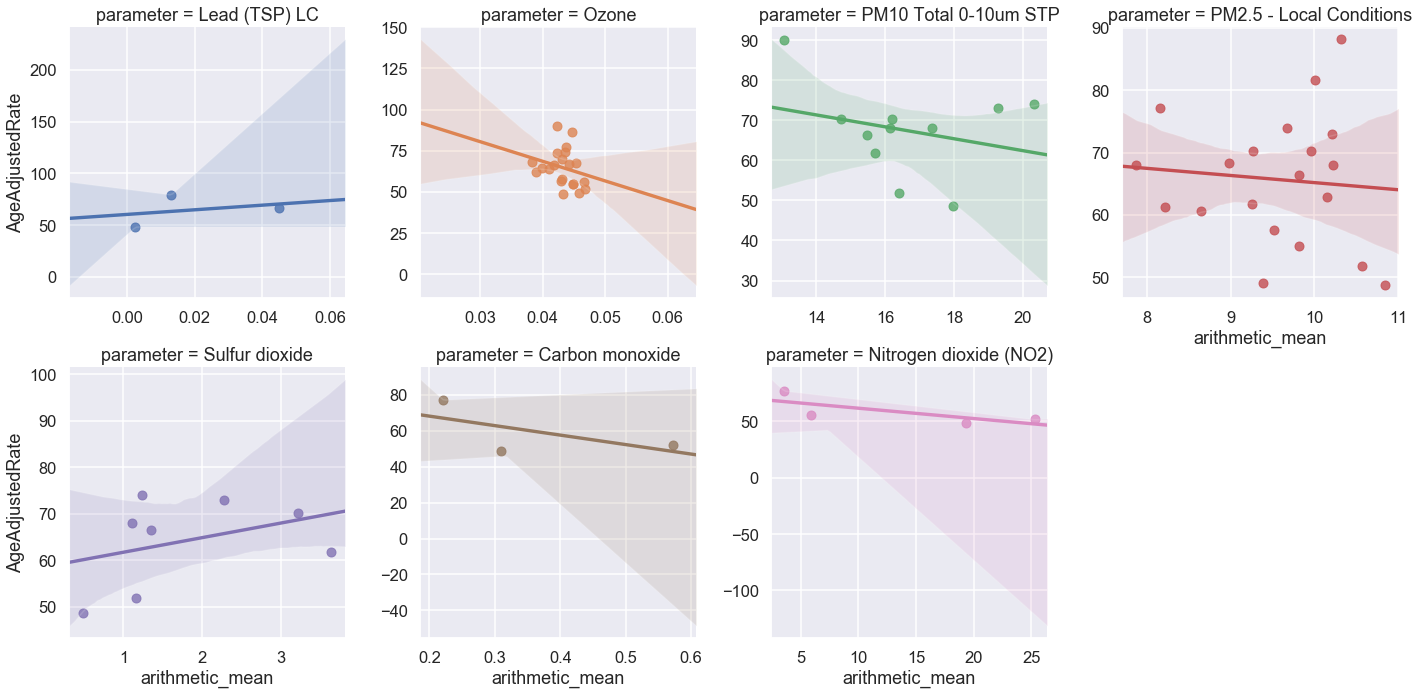

In [189]:
ga_lm = sns.lmplot(
    x='arithmetic_mean',
    y='AgeAdjustedRate', 
    hue='parameter', 
    col='parameter', 
    data=ga_merged_df, 
    col_wrap=4, 
    sharex=False, 
    sharey=False);

ga_lm.savefig('plots/ga_relations_by_param.png')

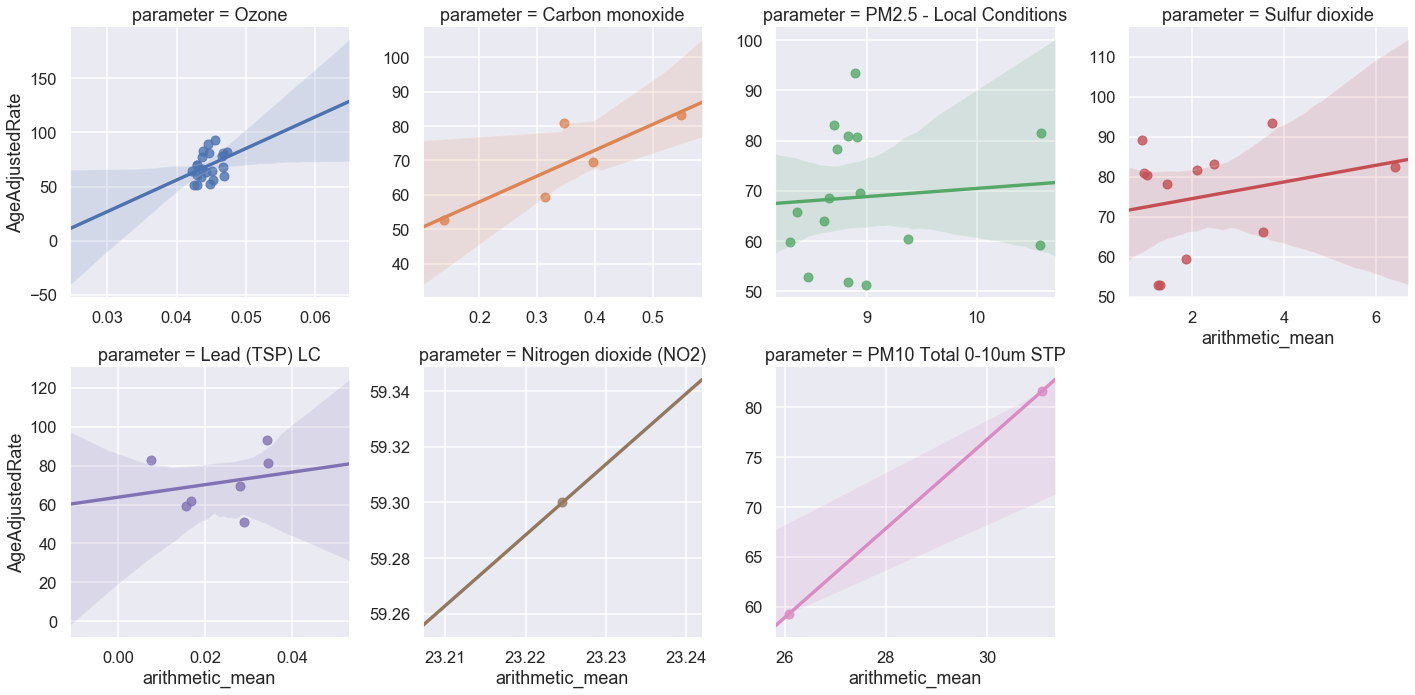

In [190]:
il_lm = sns.lmplot(
    x='arithmetic_mean',
    y='AgeAdjustedRate', 
    hue='parameter', 
    col='parameter', 
    data=il_merged_df, 
    col_wrap=4, 
    sharex=False, 
    sharey=False);

il_lm.savefig('plots/il_relations_by_param.png')

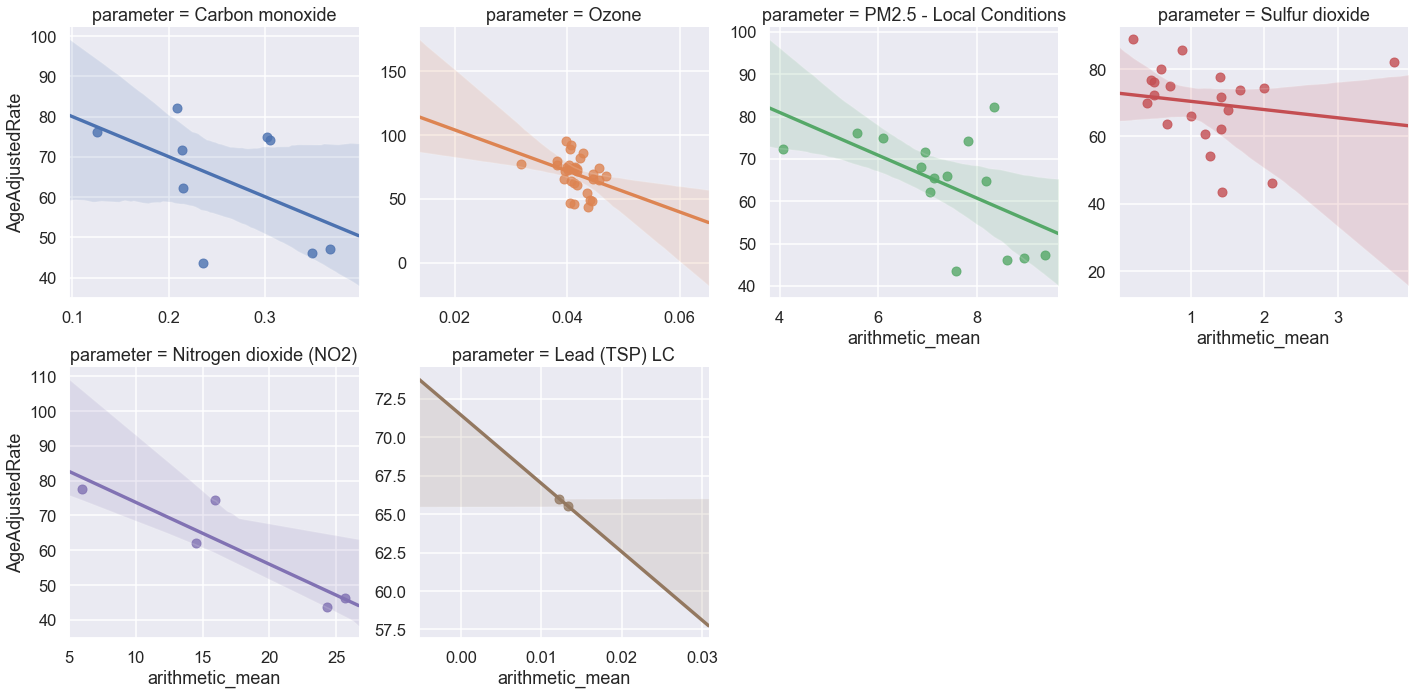

In [191]:
ny_lm = sns.lmplot(
    x='arithmetic_mean',
    y='AgeAdjustedRate', 
    hue='parameter', 
    col='parameter', 
    data=ny_merged_df, 
    col_wrap=4, 
    sharex=False, 
    sharey=False);

ny_lm.savefig('plots/ny_relations_by_param.png')

## Hypothesis Testing
Time to do hypothesis testing. This is super inconclusive at the moment.

In [192]:
il_merged_ozone = il_merged_df.loc[il_merged_df.parameter == 'Ozone']
il_merged_ozone.head()

,county,parameter,county_code,site_number,parameter_code,year,observation_count,exceptional_data_count,null_observation_count,arithmetic_mean,standard_deviation,Year,AgeAdjustedRate,CaseCount,Population
0,Adams,Ozone,1.0,7.000000,44201.0,2014.000000,5809.400000,0.000000,79.400000,0.042986,0.010343,2012-2016,70.1,333,334838
2,Champaign,Ozone,19.0,504.000000,44201.0,2014.000000,7721.025000,0.000000,128.325000,0.044802,0.011319,2012-2016,52.8,499,1034430
5,Clark,Ozone,23.0,1.000000,44201.0,2014.000000,4496.100000,0.000000,82.850000,0.043720,0.011094,2012-2016,77.6,88,80111
9,Cook,Ozone,31.0,2350.711538,44201.0,2013.942308,6472.514423,24.586538,64.903846,0.043501,0.013575,2012-2016,59.3,16642,26218615
13,DuPage,Ozone,43.0,6001.000000,44201.0,2014.000000,5501.400000,0.000000,91.800000,0.042919,0.013122,2012-2016,51.8,2643,4657275


In [193]:
stats.ttest_ind(il_merged_ozone.AgeAdjustedRate, il_merged_ozone.arithmetic_mean, equal_var=False)

Ttest_indResult(statistic=26.376875733156012, pvalue=1.3917426992674752e-17)

In [194]:
ca_merged_ozone = ca_merged_df.loc[ca_merged_df.parameter == 'Ozone']
ca_merged_ozone.head()

,county,parameter,county_code,site_number,parameter_code,year,observation_count,exceptional_data_count,null_observation_count,arithmetic_mean,standard_deviation,Year,AgeAdjustedRate,CaseCount,Population
2,Alameda,Ozone,1.0,615.782609,44201.0,2014.217391,7090.652174,159.184783,49.826087,0.033779,0.010086,2012-2016,41.5,3416,8041533
5,Amador,Ozone,5.0,2.000000,44201.0,2014.000000,7972.000000,0.000000,80.650000,0.044246,0.014714,2012-2016,59.5,209,185015
8,Butte,Ozone,7.0,7.000000,44201.0,2013.818182,7315.454545,0.000000,98.159091,0.044148,0.012274,2012-2016,57.8,849,1117709
11,Calaveras,Ozone,9.0,1.000000,44201.0,2014.000000,7980.500000,0.000000,97.200000,0.045365,0.014261,2012-2016,45.7,191,224439
14,Colusa,Ozone,11.0,1002.000000,44201.0,2014.000000,7887.850000,0.000000,99.850000,0.040056,0.011132,2012-2016,53.2,57,106940


In [195]:
stats.ttest_ind(ca_merged_ozone.AgeAdjustedRate, ca_merged_ozone.arithmetic_mean, equal_var=False)

Ttest_indResult(statistic=41.726079246308025, pvalue=2.246129775721289e-39)

In [196]:
ny_merged_ozone = ny_merged_df.loc[ny_merged_df.parameter == 'Ozone']
ny_merged_ozone.head()

,county,parameter,county_code,site_number,parameter_code,year,observation_count,exceptional_data_count,null_observation_count,arithmetic_mean,standard_deviation,Year,AgeAdjustedRate,CaseCount,Population
1,Albany,Ozone,1.0,12.000000,44201.0,2014.000000,7884.20,0.0,64.700000,0.041735,0.011822,2012-2016,71.6,1331,1539493
6,Bronx,Ozone,5.0,121.500000,44201.0,2014.000000,7488.60,0.0,36.775000,0.041254,0.013873,2012-2016,46.2,3194,7225933
9,Chautauqua,Ozone,13.0,6.833333,44201.0,2013.666667,7878.50,0.0,58.541667,0.046975,0.011959,2012-2016,68.0,622,658515
12,Chemung,Ozone,15.0,3.000000,44201.0,2012.000000,7800.25,0.0,82.750000,0.041271,0.013085,2012-2016,73.9,434,438055
14,Dutchess,Ozone,27.0,7.000000,44201.0,2014.000000,7847.40,0.0,70.700000,0.041765,0.012063,2012-2016,60.7,1147,1480279


In [197]:
stats.ttest_ind(ny_merged_ozone.AgeAdjustedRate, ny_merged_ozone.arithmetic_mean, equal_var=False)

Ttest_indResult(statistic=28.74726063706955, pvalue=2.1559677593466494e-23)

In [198]:
ga_merged_ozone = ga_merged_df.loc[ga_merged_df.parameter == 'Ozone']
ga_merged_ozone.head()

,county,parameter,county_code,site_number,parameter_code,year,observation_count,exceptional_data_count,null_observation_count,arithmetic_mean,standard_deviation,Year,AgeAdjustedRate,CaseCount,Population
1,Bibb,Ozone,21.0,12.0,44201.0,2014.0,5375.80,0.0,26.75,0.043618,0.011525,2012-2016,74.0,661,773420
5,Chatham,Ozone,51.0,21.0,44201.0,2014.0,5329.20,0.0,38.60,0.039020,0.010351,2012-2016,61.8,943,1413533
9,Chattooga,Ozone,55.0,1.0,44201.0,2014.0,5182.75,0.0,14.35,0.042338,0.010392,2012-2016,89.9,147,125251
11,Clarke,Ozone,59.0,2.0,44201.0,2014.0,5341.35,0.0,32.35,0.043146,0.011054,2012-2016,57.6,273,610843
14,Cobb,Ozone,67.0,3.0,44201.0,2014.0,4661.50,0.0,24.40,0.044811,0.011984,2012-2016,55.0,1754,3647154


In [199]:
stats.ttest_ind(ga_merged_ozone.AgeAdjustedRate, ga_merged_ozone.arithmetic_mean, equal_var=False)

Ttest_indResult(statistic=26.2579443062047, pvalue=5.656353999923888e-17)

In [203]:
criteria_params = analysis_fetcher.get_parameter_list_by_class('CRITERIA')

In [206]:
test_results = {}

for p in criteria_params.parameter_description:
    ca_subset = ca_merged_df.loc[ca_merged_df.parameter == p]
    ny_subset = ny_merged_df.loc[ny_merged_df.parameter == p]
    il_subset = il_merged_df.loc[il_merged_df.parameter == p]
    ga_subset = ga_merged_df.loc[ga_merged_df.parameter == p]
    
    ca_test = stats.ttest_ind(ca_subset.AgeAdjustedRate, ca_subset.arithmetic_mean, equal_var=False)
    ny_test = stats.ttest_ind(ny_subset.AgeAdjustedRate, ny_subset.arithmetic_mean, equal_var=False)
    il_test = stats.ttest_ind(il_subset.AgeAdjustedRate, il_subset.arithmetic_mean, equal_var=False)
    ga_test = stats.ttest_ind(ga_subset.AgeAdjustedRate, ga_subset.arithmetic_mean, equal_var=False)
    
    ca_res = ('CA', ca_test.statistic, ca_test.pvalue)
    ny_res = ('NY', ny_test.statistic, ny_test.pvalue)
    il_res = ('IL', il_test.statistic, il_test.pvalue)
    ga_res = ('GA', ga_test.statistic, ga_test.pvalue)
    
    test_results[p] = [ca_res, ny_res, il_res, ga_res]
    
test_results

{'Lead (TSP) LC': [('CA', 38.739162240982914, 1.9762832675527944e-09),
  ('NY', 262.94820112504095, 0.002420940676261182),
  ('IL', 12.453900605857976, 1.6374870509197173e-05),
  ('GA', 7.24790167974256, 0.018508917687700917)],
 'Carbon monoxide': [('CA', 38.99788907586873, 1.3092822267646475e-24),
  ('NY', 12.865668312242088, 1.258125039947593e-06),
  ('IL', 11.64765628787922, 0.0003101300343200643),
  ('GA', 6.520059940860414, 0.022708783763355885)],
 'Sulfur dioxide': [('CA', 32.246445567215254, 2.1385547010669115e-15),
  ('NY', 26.617700216413212, 3.3994413035722016e-17),
  ('IL', 18.18189916517822, 1.0059145479210984e-09),
  ('GA', 18.505863516697936, 2.4804172545619294e-07)],
 'Nitrogen dioxide (NO2)': [('CA', 23.748311725393506, 1.0294286605397326e-32),
  ('NY', 5.537963055025423, 0.0014957146044672844),
  ('IL', nan, nan),
  ('GA', 5.405375090649204, 0.0018808033692712983)],
 'Ozone': [('CA', 41.726079246308025, 2.246129775721289e-39),
  ('NY', 28.74726063706955, 2.155967759346

## Alternative Hypothesis Testing
More

In [207]:
all_dfs_merged = pd.concat([ca_merged_df, ny_merged_df, il_merged_df, ga_merged_df])

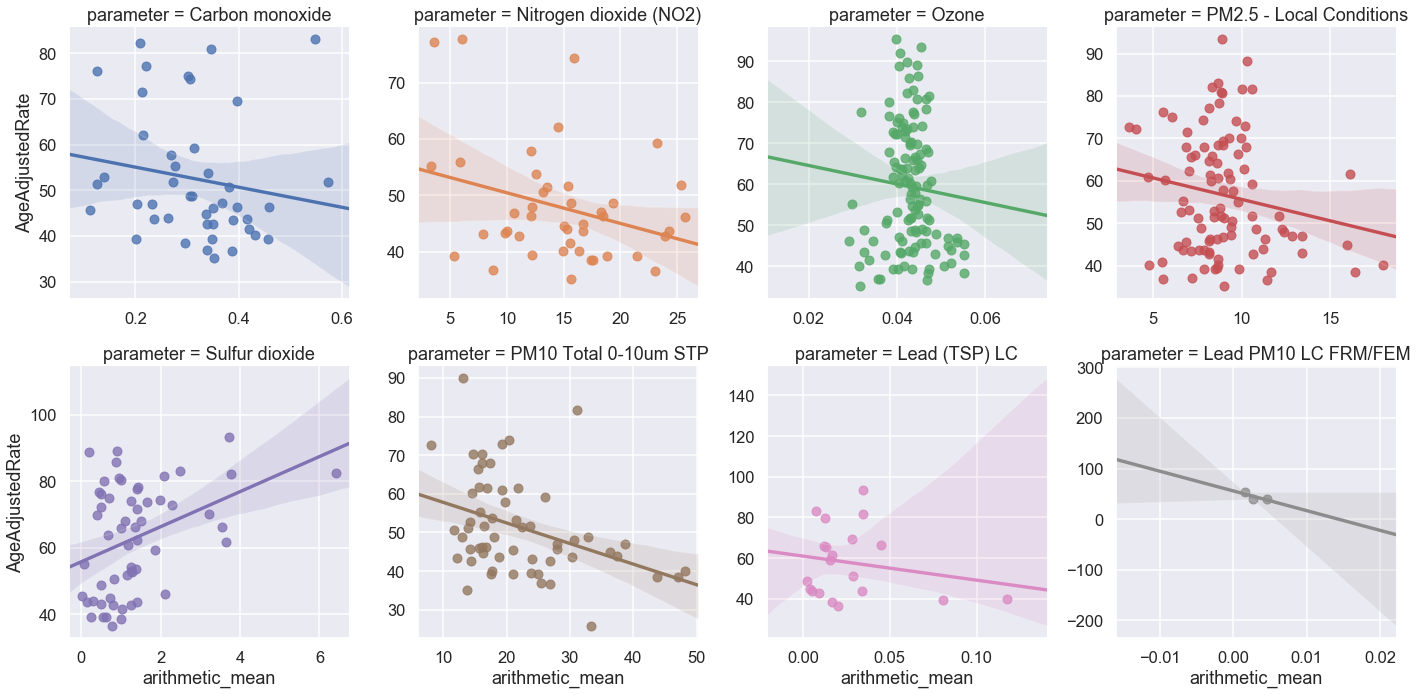

In [208]:
all_lm = sns.lmplot(
    x='arithmetic_mean',
    y='AgeAdjustedRate', 
    hue='parameter', 
    col='parameter', 
    data=all_dfs_merged, 
    col_wrap=4, 
    sharex=False, 
    sharey=False);

ny_lm.savefig('plots/summative_relations_by_param.png')

In [209]:
summative_test_results = {}

for p in criteria_params.parameter_description:
    subset = all_dfs_merged.loc[all_dfs_merged.parameter == p]
    
    test = stats.ttest_ind(subset.AgeAdjustedRate, subset.arithmetic_mean, equal_var=False)
    
    res = (test.statistic, test.pvalue)
    
    summative_test_results[p] = res
    
summative_test_results

{'Lead (TSP) LC': (14.92522136537756, 6.009104323449107e-12),
 'Carbon monoxide': (24.9919399264323, 3.069412432950049e-27),
 'Sulfur dioxide': (28.70335144906157, 2.1025617856451114e-35),
 'Nitrogen dioxide (NO2)': (18.624003247703293, 4.7310701538182e-28),
 'Ozone': (43.31744496175117, 6.275074598405162e-76),
 'PM10 Total 0-10um STP': (14.619087460323165, 5.1231250256250856e-27),
 'Lead PM10 LC FRM/FEM': (9.494896751427847, 0.010911033854319581),
 'PM2.5 - Local Conditions': (32.85060152519132, 2.398944040593018e-56)}